MAC 5768 - Visão e Processamento de Imagens

Segundo Semestre - 2020

Equipe:

    Ciro B Rosa - ciro.rosa@alumni.usp.br
    Josilton Sousa - josilton.sousa@gmail.com

Projeto de elaboração de tarefas do curso de Visão e Processamento de Imagens.


Fase 3 - Parte 1 - Entrega em 19/01/2021

Objetivos:
* Geração de arquivo "thresholdManual" contendo pelo menos 15% * 1080 = 162 fotos segmentadas manualmente (Ground Truth) a partir do "originalGrayDataset".
* Geração de arquivo contendo todas as fotos do "originalGrayDataset" segmentadas automaticamente. Para esta etapa, a equipe decidiu por utilizar dois algoritmos para segmentação automática, escolhidos empiricamente: Otsu e Yen. Desta forma, as pastas "thresholdOtsu" e "thresholdYen" serão geradas.


Segmentação Manual:

Uma quantidade equivalente a 15% das fotos contidas no dataset originalGrayDataset" foram segmentadas manualmente, utilizando-se para tal o software "Gimp". As fotos segmentadas manualmente (160 fotos) foram armazenadas no dataset "thresholdManual", junto com o respectivo arquivo de metadados.

Segmentação Automática - Escolha de algoritmo

O mesmo "originalGrayDataset" foi segmentado por dois métodos automáticos distintos, escolhidos de forma empírica a partir da demonstração a seguir. Com os resultados da demonstração, a equipe decidiu-se pelos algoritmos de "Otso" e Yen" conforme exposto mais abaixo.

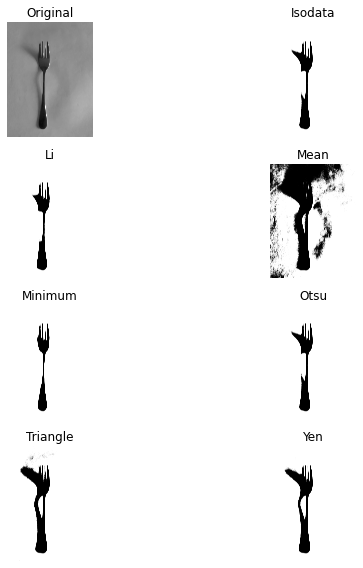

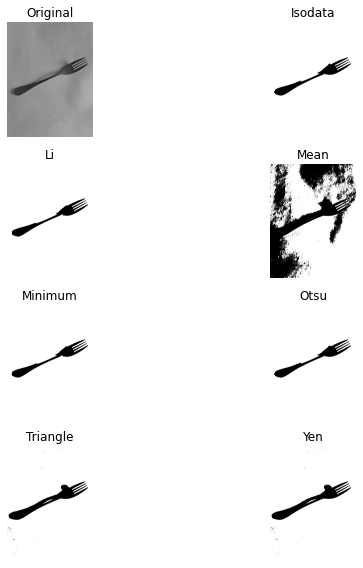

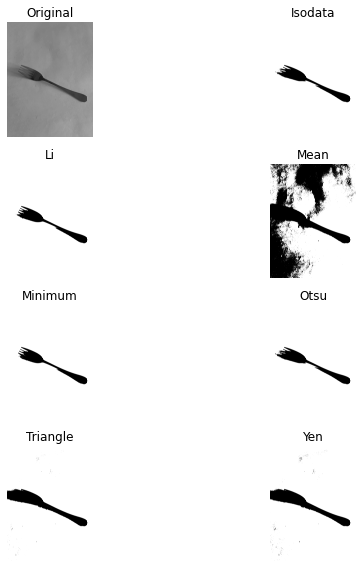

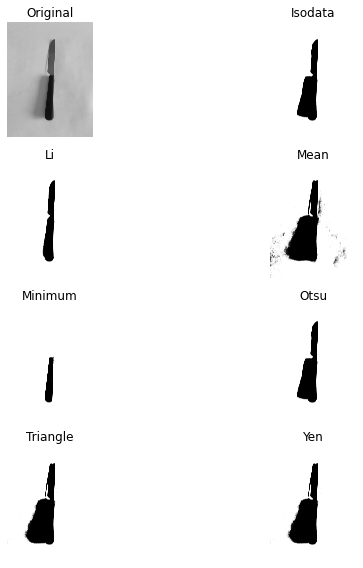

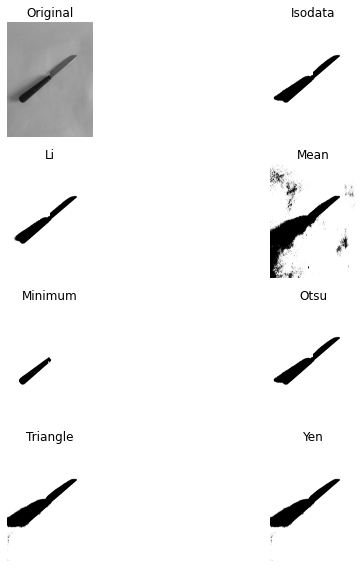

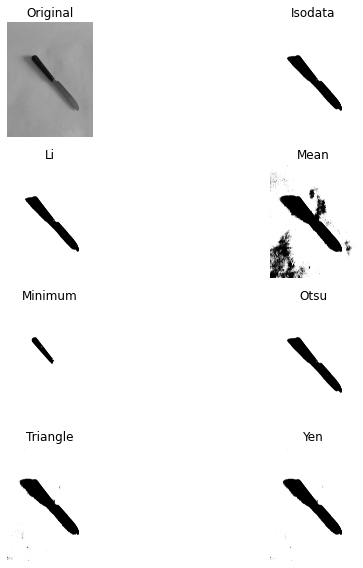

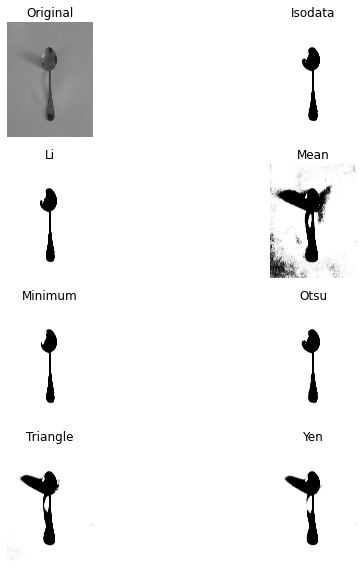

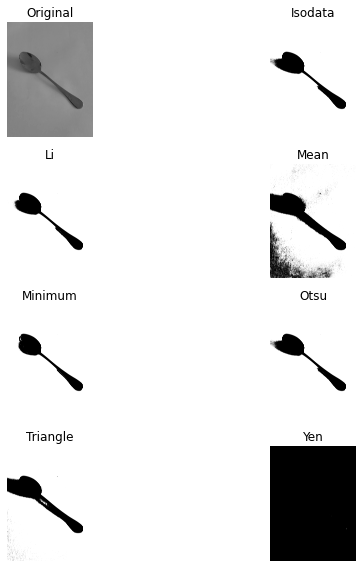

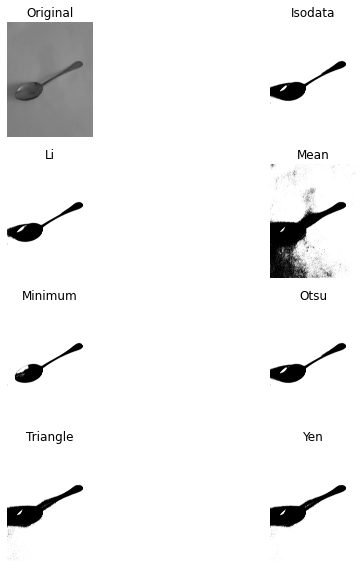

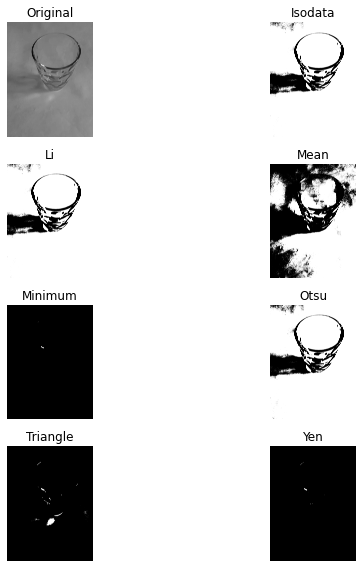

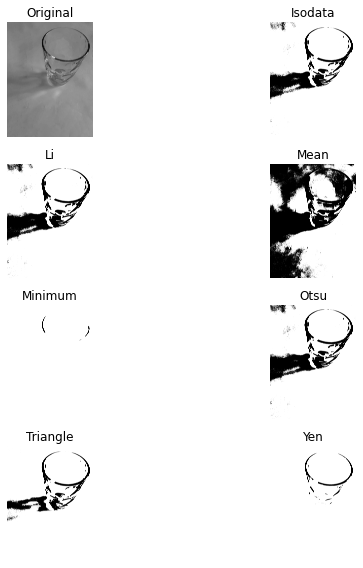

In [1]:
import os
from skimage import io
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt


# arquivo de entrada em cinza
pasta1 = "./originalGrayDataset/"
lista_fotos = os.listdir(pasta1)

i = 0
for foto in lista_fotos:
    fullname1 = pasta1 + foto
    img = io.imread(fullname1)
    fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
    plt.show()

    i += 1
    if i > 10:
        break


Segmentação Automática - Otsu e Yen

Escolhidos os algoritmos para segmentação automática, aplicam-se ambos ao "originalGrayDataset". São gerados dois novos datasets como resultado: "thresholdOtsu" e "thresholdYen".

In [1]:
import os
from skimage import io, img_as_ubyte
from skimage.filters import threshold_otsu, threshold_yen
import matplotlib.pyplot as plt
import pandas as pd

# extrair sufixo do arquivo
def sufixo(arq):
    suf = arq[-4:]
    return suf

# arquivo de entrada em cinza
pasta1 = "./originalGrayDataset/"
lista_fotos = os.listdir(pasta1)

# ler metadados em cinza
metafile1 = "grade.csv"
filename1 = pasta1 + metafile1
df1 = pd.read_csv(filename1, sep=";")
print(df1.head(5), "\n")

# arquivos de saída de fotos após threshold
pasta2 = "./thresholdOtsu/"
pasta3 = "./thresholdYen/"

for foto in lista_fotos:
    if sufixo(foto) != ".jpg":
        continue

    fullname1 = pasta1 + foto
    img = io.imread(fullname1)
    
    # threshold Otsu
    thresh2 = threshold_otsu(img)
    binary2 = img > thresh2
    binary2 = img_as_ubyte(binary2)

    # threshold Yen    
    thresh3 = threshold_yen(img)
    binary3 = img > thresh3
    binary3 = img_as_ubyte(binary3)
    
    """
    # plotagem de fotos "mnist-like"
    plt.close("all")
    f, ax = plt.subplots(1, 3, figsize=(10, 10))

    ax[0].set_title("originalGrayDataset")
    ax[0].set(xticks=[], yticks=[])
    ax[0].imshow(img, cmap=plt.cm.gray)

    ax[1].set_title("thresholdOtsu")
    ax[1].set(xticks=[], yticks=[])
    ax[1].imshow(binary2, cmap=plt.cm.gray)
    
    ax[2].set_title("thresholdYen")
    ax[2].set(xticks=[], yticks=[])
    ax[2].imshow(binary3, cmap=plt.cm.gray)
    
    plt.tight_layout()
    io.show()
    """
    # gravação das imagens
    f2 = pasta2 + foto
    io.imsave(f2, binary2)
    
    f3 = pasta3 + foto
    io.imsave(f3, binary3)
    #break

# gravar metadados
df2 = df1
df2.transformacao = "seg otsu"
metafile2 = metafile1
filename2 = pasta2 + metafile2
df2.to_csv(filename2, 
           index = False, 
           header=True, 
           sep=";")
print(df2.head(5), "\n")

df3 = df1
df3.transformacao = "seg yen"
metafile3 = metafile1
filename3 = pasta3 + metafile3
df3.to_csv(filename3, 
           index = False, 
           header=True, 
           sep=";")
print(df3.head(5), "\n")


   sequencia objeto tipo_obj   fundo  iluminacao transformacao responsavel  \
0          1  garfo        a  branco  indoor dia         cinza    Josilton   
1          2  garfo        a  branco  indoor dia         cinza    Josilton   
2          3  garfo        a  branco  indoor dia         cinza    Josilton   
3          1   faca        a  branco  indoor dia         cinza    Josilton   
4          2   faca        a  branco  indoor dia         cinza    Josilton   

    arquivo  
0  1081.jpg  
1  1082.jpg  
2  1083.jpg  
3  1084.jpg  
4  1085.jpg   



<ipython-input-1-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1088.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-1-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1090.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-1-25f15d1fa56c>:65: UserWarning: ./thresholdOtsu/1099.jpg is a low contrast image
  io.imsave(f2, binary2)
<ipython-input-1-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1099.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-1-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1100.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-1-25f15d1fa56c>:65: UserWarning: ./thresholdOtsu/1101.jpg is a low contrast image
  io.imsave(f2, binary2)
<ipython-input-1-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1101.jpg is a low contrast image
  io.imsave(f3, binary3)


KeyboardInterrupt: 